In [1]:
import numpy as np
import sympy as sym


ImportError: No module named 'sympy'

In [2]:
sym.init_printing()

In [3]:
X = sym.Matrix(sym.MatrixSymbol("x",3,3))

In [4]:
Y = sym.Matrix(sym.MatrixSymbol("y",3,1))

In [5]:
w = sym.symbols("w")

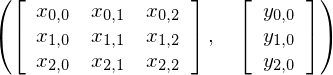

In [6]:
X, Y

In [7]:
X[2,:] = X[1,:]
X[2,2] = X[1,1]
X[1,2] = w
X[2,1] = w
X[0,1] = X[1,0]
X[0,2] = X[0,1]

Y[2,0] = Y[1,0]

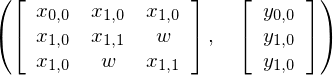

In [8]:
X, Y

In [9]:
X_inv = X.inv()

In [10]:
X_inv_simp = sym.simplify(X_inv)

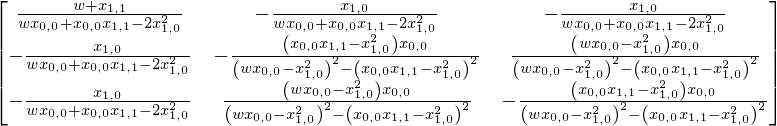

In [11]:
X_inv_simp

In [12]:
dot = Y.T*X_inv_simp*Y

In [13]:
dot = sym.simplify(dot)

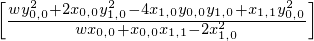

In [14]:
dot

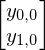

In [15]:
Y[:2,:]

In [16]:
unw_dot = sym.simplify(Y[:2,:].T*sym.simplify(X[:2,:2].inv())*Y[:2,:])

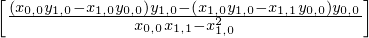

In [17]:
unw_dot

In [18]:
n,d = sym.fraction(dot[0,0])

In [19]:
unw_n, unw_d = sym.fraction(unw_dot[0,0])

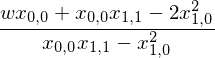

In [20]:
sym.simplify(d/unw_d)

In [21]:
sym.factor(d)

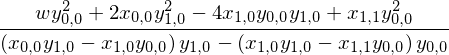

In [22]:
sym.simplify(n/unw_n)

In [23]:
sym.simplify(n-unw_n)

In [24]:
blah = sym.simplify(dot[0,0].subs(w,0))

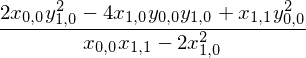

In [25]:
blah

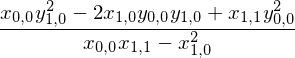

In [26]:
sym.simplify(sym.expand(unw_dot[0,0]))

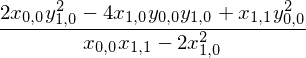

In [27]:
sym.simplify(unw_dot[0,0].subs(X[1,0],X[1,0]*sym.sqrt(2)).subs(Y[1,0],Y[1,0]*sym.sqrt(2)))

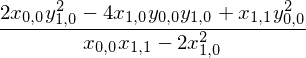

In [28]:
blah

In [29]:
unw_X, unw_Y = X[:2,:2], Y[:2,0]

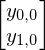

In [30]:
unw_Y

In [31]:
#unw_X = unw_X/2

In [32]:
unw_X[1,1] /= 2

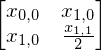

In [33]:
unw_X

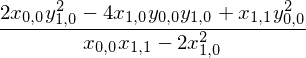

In [34]:
sym.simplify(unw_Y.T*sym.simplify(unw_X.inv())*unw_Y)[0,0]

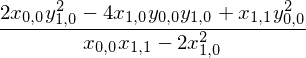

In [35]:
blah

In [67]:
X = sym.Matrix(sym.MatrixSymbol("x",4,4))
Y = sym.Matrix(sym.MatrixSymbol("y",4,1))
w = sym.symbols("w")

In [68]:
X[0,3] = X[0,2]
X[1,3] = X[1,2]
X[2,3] = w
X[3,3] = X[2,2]

for i in range(X.shape[0]):
    for j in range(i,X.shape[1]):
        X[j,i] = X[i,j]

Y[3,0] = Y[2,0]

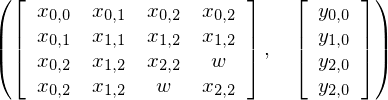

In [69]:
X,Y

In [78]:
X_inv = sym.simplify(X.inv())

In [79]:
dot = sym.simplify(Y.T * X_inv * Y)

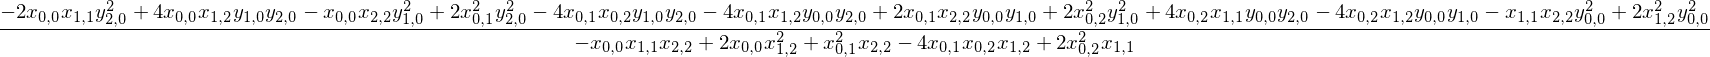

In [80]:
sym.simplify(dot.subs(w,0))[0,0]

In [129]:
w_X, w_Y = X[:3,:3], Y[:3,:]

In [130]:
w_X[2,2] /= 2

In [131]:
w_X_inv = sym.simplify(w_X.inv())

In [132]:
w_dot = sym.simplify(w_Y.T * w_X_inv * w_Y)

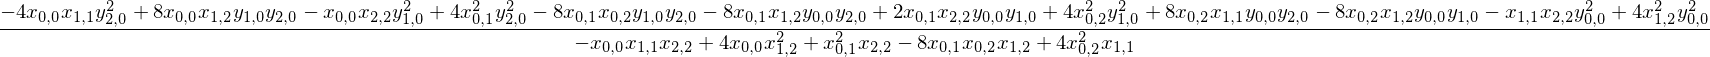

In [133]:
sym.simplify(w_dot[0,0].subs(X[2,2],X[2,2]/2))

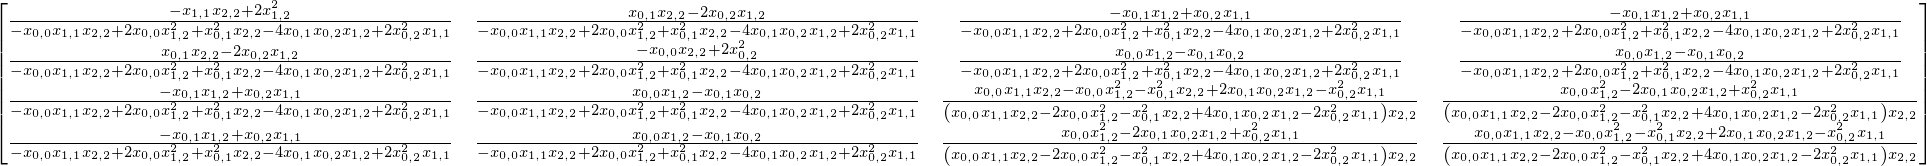

In [134]:
sym.simplify(sym.factor(X_inv.subs(w,0)))

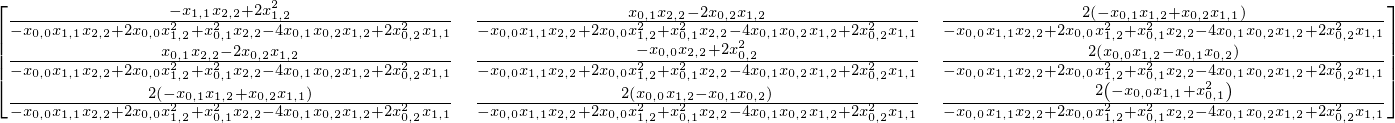

In [135]:
sym.simplify(sym.expand(w_X_inv))

In [136]:
X_inv_divide_commonD = X_inv * sym.fraction(X_inv[0,0])[1]

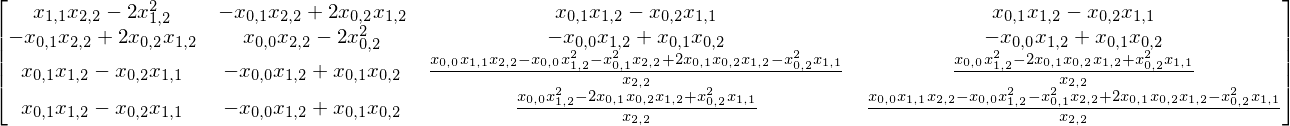

In [139]:
sym.factor(sym.simplify(X_inv_divide_commonD.subs(w,0)))

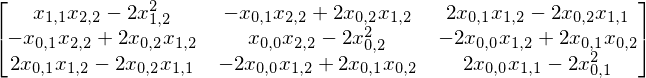

In [138]:
sym.simplify(sym.expand((w_X_inv * sym.fraction(w_X_inv[0,0])[1])))

In [145]:
sym.simplify(X.subs(w,0).det())

In [147]:
sym.simplify(w_X.det()*2)

In [148]:
w_X[2,2]*=2/w

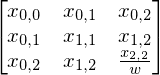

In [180]:
w_X

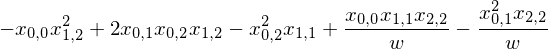

In [161]:
sym.expand(sym.simplify(w_X.det()))

In [157]:
X5 = sym.Matrix(sym.MatrixSymbol("x",5,5))
X5[0,3] = X5[0,2]
X5[1,3] = X5[1,2]
X5[2,3] = 0
X5[3,3] = X5[2,2]
X5[4,3] = 0
X5[0,4] = X5[0,2]
X5[1,4] = X5[1,2]
X5[2,4] = 0
X5[3,4] = 0
X5[4,4] = X5[2,2]

for i in range(X5.shape[0]):
    for j in range(i,X5.shape[1]):
        X5[j,i] = X5[i,j]

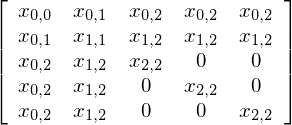

In [158]:
X5

In [159]:
sym.simplify(X5.det())

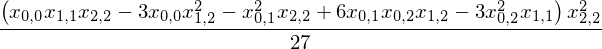

In [179]:
sym.simplify((w_X.det()*w_X[2,2]**(w-1)).subs(w,3))

In [181]:
A = X5[:3,:3]
B = X5[:3,3:]
C = X5[3:,:3]
D = X5[3:,3:]

In [184]:
blah = sym.simplify((D-C*A.inv()*B)).det()

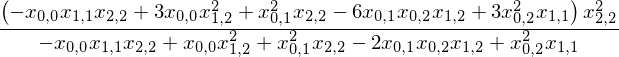

In [186]:
sym.simplify(sym.factor(blah))

In [2]:
import sklearn.gaussian_process
import numpy as np
import sys
#sys.path.append('/home/brown/python_packages/patched_gpr')
print(sys.path)
import patched_gpr
import importlib
import local_models
import local_models.local_models


['/home/brown/python_packages/local_models/examples', '/home/brown/python_packages/local_models', '/home/brown/python_packages/ml_battery', '/home/brown/python_packages/patched_gpr', '/usr/lib/python35.zip', '/usr/lib/python3.5', '/usr/lib/python3.5/plat-x86_64-linux-gnu', '/usr/lib/python3.5/lib-dynload', '', '/usr/local/lib/python3.5/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.5/dist-packages/IPython/extensions', '/home/brown/.ipython']


In [3]:
class ConstantKernel(sklearn.gaussian_process.kernels.Kernel):
    def __init__(self, weights=None):
        if weights is None:
            raise Exception("must provide weights")
        self.weights = weights
        self.normalized_weights = np.max(self.weights)/self.weights #Why is this justified?
    def __call__(self, X, Y=None, eval_gradient=False):
        calt = np.ones((X.shape[0], X.shape[0]))
        calt[np.diag_indices_from(calt)] = self.normalized_weights
        if eval_gradient:
            return calt, np.empty((X.shape[0], X.shape[0], 0))
        return calt
    def diag(self, X):
        return self.normalized_weights
    def is_stationary(self):
        return True

In [4]:
class MonkeyPatchGPR(sklearn.gaussian_process.GaussianProcessRegressor):
    def fit(self, X, *args, sample_weight=None, **kwargs):
        import numpy as np
        if sample_weight is not None:
            old_kernel = self.kernel
            self.kernel = old_kernel*ConstantKernel(sample_weight)
            print(self.kernel(X))
            result = super().fit(X, *args, **kwargs)
            self.kernel = old_kernel
            self.kernel_ = self.kernel_.k1
        else:
            result = super().fit(*args, **kwargs)
        return result

In [3]:
kernel = (
    (
        sklearn.gaussian_process.kernels.ConstantKernel() *
        sklearn.gaussian_process.kernels.WhiteKernel()
    ) +
    (
        sklearn.gaussian_process.kernels.ConstantKernel() *
        sklearn.gaussian_process.kernels.RBF()
    )
)

In [4]:
importlib.reload(patched_gpr)
gpr = patched_gpr.GaussianProcessRegressor(kernel,alpha=0)

In [5]:
n = 100
xx = np.linspace(-50,50,n)
xx_dense = np.linspace(-50,50,n*5)
yy = np.sin(xx**2/100) + np.random.normal(0,0.06,n)

In [6]:
import matplotlib.pyplot as plt
import scipy.stats

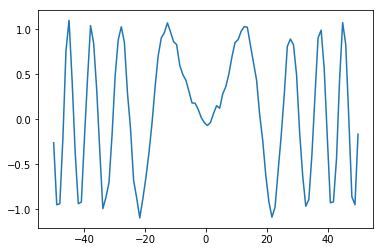

In [7]:
plt.plot(xx, yy)

In [8]:
gpr.fit(xx.reshape(-1,1),yy,sample_weight=np.full(xx.shape[0],1.))

GaussianProcessRegressor(alpha=0, copy_X_train=True,
                         kernel=1**2 * WhiteKernel(noise_level=1) + 1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [9]:
gpr.kernel_.theta

array([-2.97029497, -2.97029497,  0.00741369,  0.94479378])

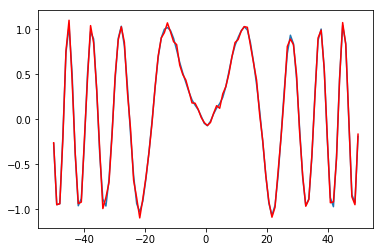

In [10]:
plt.plot(xx, gpr.predict(xx.reshape(-1,1)))
plt.plot(xx,yy,c='r')

In [11]:
gpr = sklearn.gaussian_process.GaussianProcessRegressor(kernel,alpha=0)

In [12]:
gpr.fit(xx.reshape(-1,1),yy)

GaussianProcessRegressor(alpha=0, copy_X_train=True,
                         kernel=1**2 * WhiteKernel(noise_level=1) + 1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [13]:
gpr.kernel_

0.226**2 * WhiteKernel(noise_level=0.0513) + 1**2 * RBF(length_scale=2.57)

In [14]:
gpr.kernel_.theta

array([-2.97029497, -2.97029497,  0.00741369,  0.94479378])

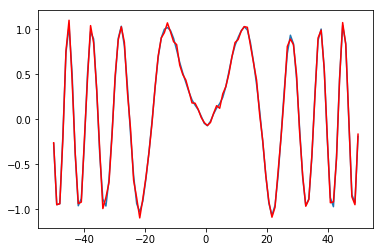

In [15]:
plt.plot(xx, gpr.predict(xx.reshape(-1,1)))
plt.plot(xx,yy,c='r')

In [16]:
class GPR(patched_gpr.GaussianProcessRegressor):
    def fit(self, *args, sample_weight=None, **kwargs):
        if "beta0" in kwargs:
            self.kernel.theta = kwargs["beta0"]
            del kwargs["beta0"]
        all_done = super().fit(*args, sample_weight=sample_weight, **kwargs)
        self.coef_ = self.kernel_.theta
        self.intercept_ = np.array(())
        return all_done

In [17]:
weights = scipy.stats.norm.pdf(xx,0,10)
weights /= np.max(weights)

In [18]:
gpr = GPR(kernel,alpha=0)

In [19]:
gpr.fit(xx.reshape(-1,1),yy,sample_weight=weights)

GPR(alpha=0, copy_X_train=True,
    kernel=1**2 * WhiteKernel(noise_level=1) + 1**2 * RBF(length_scale=1),
    n_restarts_optimizer=0, normalize_y=False, optimizer='fmin_l_bfgs_b',
    random_state=None)

In [20]:
gpr.kernel_

0.00559**2 * WhiteKernel(noise_level=1e-05) + 0.238**2 * RBF(length_scale=5.13)

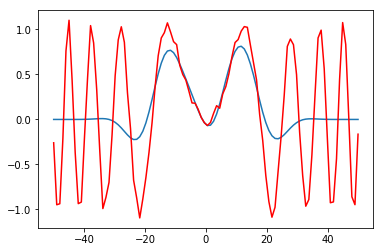

In [21]:
plt.plot(xx, gpr.predict(xx.reshape(-1,1)))
plt.plot(xx,yy,c='r')

In [279]:
lm_kernel = local_models.local_models.TriCubeKernel(bandwidth=30)
gpr_models = local_models.local_models.LocalModels(gpr)
gpr_models.fit(xx.reshape(-1,1),yy)

In [285]:
gpr_params, the_models = gpr_models.transform(xx_dense.reshape(-1,1),r=lm_kernel.support_radius(),weighted=True,kernel=lm_kernel,neighbor_beta0s=True, batch_size=xx_dense.shape[0],return_models=True)

/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 3, 'warnflag': 2, 'grad': array([ 0.10137788,  7.52225775, -0.62215074,  1.88496453]), 'funcalls': 73}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 11, 'warnflag': 2, 'grad': array([ 6.10276820e-05,  7.27331976e+00, -1.70509643e+00,  1.06388192e+00]), 'funcalls': 99}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 6.23093230e-05,  7.68759854e+00, -1.72647608e+00,  1.00882852e+00]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/

/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 9.66199550e-05,  7.97506172e+00, -2.15460452e+00, -8.82822066e-01]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 9.79414494e-05,  7.89159325e+00, -2.16689446e+00, -9.73698253e-01]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 9.92571616e-05,  7.80834481e+00, -2.17857298e+00, -1.06560482e+00]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packag

/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 1.27375279e-04,  8.34651415e+00, -2.21077568e+00, -3.53832486e+00]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 1.28225507e-04,  8.27488263e+00, -2.20376365e+00, -3.64259926e+00]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 1.29051817e-04,  8.70395016e+00, -2.19650031e+00, -3.74746523e+00]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packag

/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 1.39830892e-04,  9.25786965e+00, -2.16553033e+00, -4.69937826e+00]), 'funcalls': 56}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 1.40193206e-04,  9.21003392e+00, -2.14815954e+00, -4.82856851e+00]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 1.40411065e-04,  9.66331135e+00, -2.14035469e+00, -4.86961200e+00]), 'funcalls': 51}
  ConvergenceWarning)
/home/brown/python_packag

/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 1.42046492e-04,  1.08820121e+01, -1.71056836e+00, -4.70651326e+00]), 'funcalls': 55}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 1.42297213e-04,  1.13632335e+01, -1.65758407e+00, -4.85248966e+00]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 1.41675756e-04,  1.13454594e+01, -1.68171058e+00, -4.39578740e+00]), 'funcalls': 49}
  ConvergenceWarning)
/home/brown/python_packag

/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 1.39311351e-04,  1.36541470e+01, -8.28937134e-01, -3.52260059e+00]), 'funcalls': 49}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 1.39528932e-04,  1.36530942e+01, -7.65345862e-01, -3.68557310e+00]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 1.38874132e-04,  1.36522545e+01, -7.74178319e-01, -3.40791096e+00]), 'funcalls': 51}
  ConvergenceWarning)
/home/brown/python_packag

/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 1.29131550e-04,  1.46501907e+01, -2.11227930e-01, -1.86172502e+00]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 1.27506488e-04,  1.51501865e+01, -2.42606973e-01, -1.55452328e+00]), 'funcalls': 52}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 1.27687287e-04,  1.51501863e+01, -1.82045507e-01, -1.73196660e+00]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packag

/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 9.57031701e-05,  1.51501372e+01, -1.10139686e-01, -1.60292078e-01]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 9.58426980e-05,  1.51501382e+01, -6.38655624e-02, -3.80705681e-01]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 9.59773389e-05,  1.46501407e+01, -1.88306388e-02, -5.96106276e-01]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packag

/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 5.67516411e-05,  1.46500839e+01, -5.70069314e-02,  4.72728108e-02]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 5.68407395e-05,  1.46500810e+01, -1.39626618e-02, -1.47466681e-01]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 4.15960011e-05,  1.51500577e+01, -4.08213830e-01,  1.94037381e+00]), 'funcalls': 49}
  ConvergenceWarning)
/home/brown/python_packag

/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 2.09338062e-05,  1.51500283e+01, -1.26115489e-01,  4.59287492e-01]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 2.09140643e-05,  1.51500281e+01, -1.30316189e-01,  5.52517008e-01]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 2.08930171e-05,  1.46500300e+01, -1.36215728e-01,  6.53000779e-01]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packag

/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 1.98260288e-05,  1.46500309e+01, -6.93808742e-01,  3.88184221e+00]), 'funcalls': 49}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 1.97600085e-05,  1.46500298e+01, -6.88527822e-01,  3.86005373e+00]), 'funcalls': 51}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 1.96941973e-05,  1.51500269e+01, -6.90068585e-01,  3.88260795e+00]), 'funcalls': 49}
  ConvergenceWarning)
/home/brown/python_packag

/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 1.87775978e-05,  1.46500261e+01, -4.27382078e-01,  2.12404039e+00]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 1.87467869e-05,  1.51500252e+01, -4.82448986e-01,  2.38369210e+00]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 1.86812353e-05,  1.46500288e+01, -5.97220453e-01,  2.91888996e+00]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packag

/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 1.71361304e-05,  1.51500233e+01, -1.22875616e+00,  4.65416973e+00]), 'funcalls': 47}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 1.70730367e-05,  1.46500260e+01, -1.31065500e+00,  4.99931493e+00]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 1.69791357e-05,  1.46500273e+01, -1.29922316e+00,  4.86245397e+00]), 'funcalls': 49}
  ConvergenceWarning)
/home/brown/python_packag

/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 1.49828286e-05,  1.26740974e+01, -1.84101315e+00,  5.42722085e+00]), 'funcalls': 50}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 1.49015360e-05,  1.26785708e+01, -1.80996861e+00,  5.16163563e+00]), 'funcalls': 45}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 1.48426364e-05,  1.26835857e+01, -1.89846604e+00,  5.50141557e+00]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packag

/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 1.29170665e-05,  1.01590049e+01, -2.41050849e+00,  5.39057464e+00]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 1.28507763e-05,  1.01909043e+01, -2.44779886e+00,  5.52107424e+00]), 'funcalls': 50}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 1.27762556e-05,  1.02239454e+01, -2.44716194e+00,  5.49010953e+00]), 'funcalls': 56}
  ConvergenceWarning)
/home/brown/python_packag

/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 1.07371153e-05,  8.97492109e+00, -2.17811759e+00,  4.87998021e+00]), 'funcalls': 52}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 1.06462745e-05,  8.53694663e+00, -2.07017691e+00,  4.47431156e+00]), 'funcalls': 45}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 1.05720461e-05,  8.59987872e+00, -2.10648553e+00,  4.65461135e+00]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packag

/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 8.30386798e-06,  7.99129515e+00, -1.75054626e+00,  3.99031435e+00]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 0, 'warnflag': 2, 'grad': array([ 8.20841327e-06,  8.07147679e+00, -1.76323222e+00,  4.08677111e+00]), 'funcalls': 21}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 8.11205071e-06,  8.15203422e+00, -1.75366924e+00,  4.09649478e+00]), 'funcalls': 50}
  ConvergenceWarning)
/home/brown/python_packag

/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 5.65607616e-06,  7.74556164e+00, -1.12485772e+00,  3.14992551e+00]), 'funcalls': 52}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 5.55909270e-06,  7.83103215e+00, -1.10742884e+00,  3.14308638e+00]), 'funcalls': 50}
  ConvergenceWarning)
/home/brown/python_packages/patched_gpr/patched_gpr.py:505: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 1, 'warnflag': 2, 'grad': array([ 5.46755678e-06,  7.41655550e+00, -9.99292275e-01,  2.77336620e+00]), 'funcalls': 47}
  ConvergenceWarning)
/home/brown/python_packag

In [286]:
len(the_models)

500

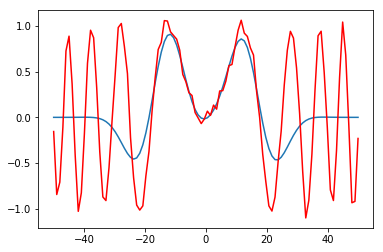

In [288]:
plt.plot(xx,the_models[250].predict(xx.reshape(-1,1)))
plt.plot(xx,yy,c='r')

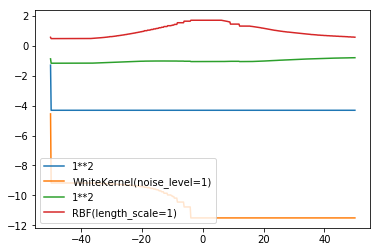

In [290]:
for i in range(gpr_params.shape[1]):
    plt.plot(xx_dense,gpr_params[:,i])
plt.legend(list(map(str,patched_gpr.decompose_kernels(kernel))))

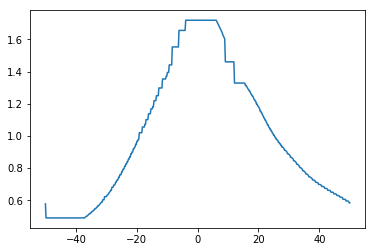

In [291]:
plt.plot(xx_dense, gpr_params[:,3])

In [9]:
import os
project_dir = "../data/local_gpr_stuff"
os.makedirs(project_dir, exist_ok=1)

In [297]:
for i in range(xx.shape[0]):
    x = xx[i]
    fig = plt.figure(figsize=(8,8))
    plt.plot(xx,yy,c='r')
    plt.plot(xx, the_models[i*5].predict(xx.reshape(-1,1)),c='b')
    plt.axis("off")
    plt.savefig(os.path.join(project_dir, "{:05d}.png".format(i)))
    plt.close(fig)

In [10]:
# turn it into a gif
import imageio
images = [imageio.imread(os.path.join(project_dir, "{:05d}.png".format(i))) for i in range(xx.shape[0])]
imageio.mimsave(os.path.join(project_dir, 'local_gpr_variable_rbf.gif'), images + images[::-1])

In [204]:
gpr = MonkeyPatchGPR(kernel,alpha=0)

In [205]:
gpr.fit(xx.reshape(-1,1),yy,sample_weight=weights)

[[5.35990545e+05 6.00404295e-01 1.29949664e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.00404295e-01 3.25111284e+05 6.00404295e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.29949664e-01 6.00404295e-01 1.99222361e+05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.99222361e+05
  6.00404295e-01 1.29949664e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.00404295e-01
  3.25111284e+05 6.00404295e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29949664e-01
  6.00404295e-01 5.35990545e+05]]


MonkeyPatchGPR(alpha=0, copy_X_train=True,
               kernel=1**2 * WhiteKernel(noise_level=1) + 1**2 * RBF(length_scale=1),
               n_restarts_optimizer=0, normalize_y=False,
               optimizer='fmin_l_bfgs_b', random_state=None)

In [206]:
gpr.kernel_

0.169**2 * WhiteKernel(noise_level=0.0286) + 0.173**2 * RBF(length_scale=4.1)

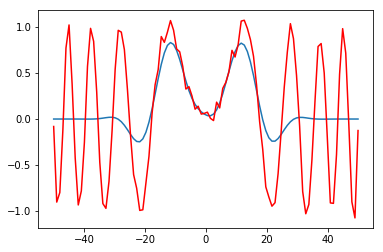

In [207]:
plt.plot(xx, gpr.predict(xx.reshape(-1,1)))
plt.plot(xx,yy,c='r')